<a href="https://colab.research.google.com/github/ajrotert/Machine-Learning/blob/master/Rotert_Assigment1_Vehicles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Description

Info

Relevant Information:

   -- Description: This data set consists of three types of entities: 

      (1) the specification of an auto in terms of various characteristics, its assigned insurance risk rating, its normalized losses in use as compared to other cars.
      
      (2) The second rating corresponds to the degree to which the auto is more risky than its price indicates.   Cars are initially assigned a risk factor symbol associated with its price.   Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale.  Actuarians call this process "symboling".   A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

      (3) The third factor is the relative average loss payment per insured vehicle year.  This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

Attribute Information: 

    Attribute followed by Attribute Range.

    1. symboling(risk): -3, -2, -1, 0, 1, 2, 3. (-3 good, 3 bad)
    2. normalized-losses: 65 - 256. (average loss to insurance company each year)
    3. make: alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo
    4. fuel-type: diesel, gas
    5. aspiration: std, turbo
    6. num-of-doors: four, two
    7. body-style: hardtop, wagon, sedan, hatchback, convertible
    8. drive-wheels: 4wd, fwd, rwd
    9. engine-location: front, rear
    10. wheel-base: 86.6 - 120.9
    11. length: 141.1 - 208.1
    12. width: 60.3 - 72.3
    13. height: 47.8 - 59.8
    14. curb-weight: 1488 - 4066
    15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor
    16. num-of-cylinders: eight, five, four, six, three, twelve, two
    18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi
    19. bore: 2.54 - 3.94
    20. stroke: 2.07 - 4.17
    21. compression-ratio: 7 - 23
    22. horsepower: 48 - 288
    23. peak-rpm: 4150 - 6600.
    24. city-mpg: 13 - 49.
    25. highway-mpg: 16 - 54.
    26. price: 5118 - 45400.






##Assigment 1
**Automobile MPG**

**Question: Can Machine Learning Algorithm predict the risk factor of a car?**

**Dependent Variable: symboling**

Loading data into file

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from google.colab import files
import io

plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')
%matplotlib inline

uploaded = files.upload()
#dataset is used for the training data
dataset = pd.read_csv(io.BytesIO(uploaded['auto.csv']), sep=",")

Saving auto.csv to auto.csv


###Looking at data

In [0]:
#renaming columns for useability
dataset = dataset.rename(columns={'highway-mpg':'mpg'})
dataset = dataset.rename(columns={'curb-weight': 'weight'})
dataset = dataset.rename(columns={'symboling': 's'})
dataset = dataset.rename(columns={'normalized-losses': 'norm'})
dataset = dataset.rename(columns={'body-style': 'body'})
dataset = dataset.rename(columns={'num-of-doors' : 'door'})
dataset = dataset.rename(columns={'num-of-cylinders' : 'cyl'})
dataset = dataset.rename(columns={'engine-type' : 'engine'})
dataset = dataset.rename(columns={'peak-rpm' : 'rpm'})

#once run, will causes errors if run again
dataset['door'].replace(['two','four'], [2, 4],inplace=True)
dataset['cyl'].replace(['eight', 'five', 'four', 'six', 'three', 'twelve', 'two'], [8, 5, 4, 6, 3, 12, 2],inplace=True)

dataset.head()

,Unnamed: 0,s,norm,make,fuel-type,aspiration,door,body,drive-wheels,engine-location,wheel-base,length,width,height,weight,engine,cyl,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,rpm,mpg,price
0,0,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,27,13495.0
1,1,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,27,16500.0
2,2,1,NaN,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154.0,5000.0,26,16500.0
3,3,2,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102.0,5500.0,30,13950.0
4,4,2,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115.0,5500.0,22,17450.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3664dc6ba8>,
      dtype=object)

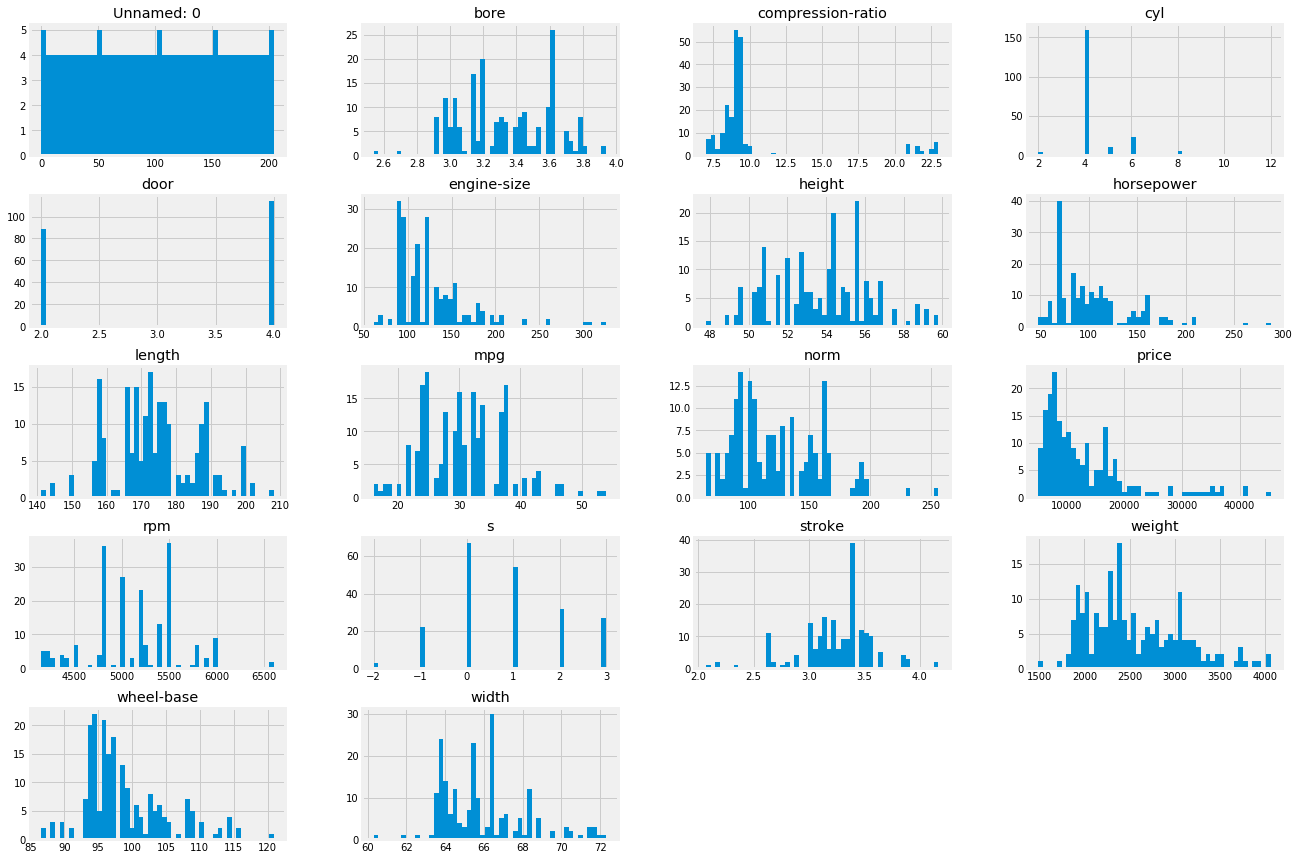

In [0]:
dataset.hist(bins=50, figsize=(20,15))

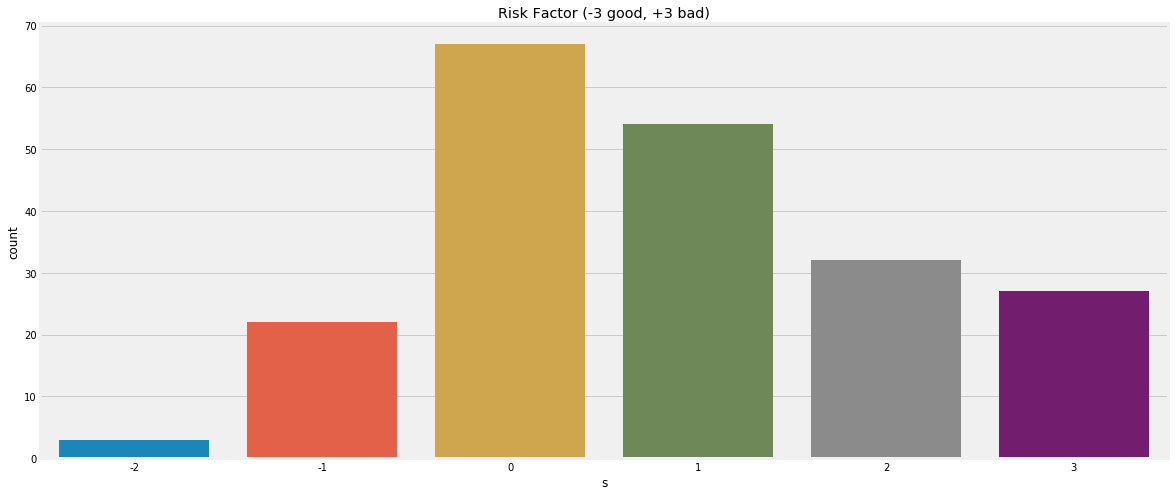

In [0]:
f,ax=plt.subplots(1,figsize=(18,8))
sns.countplot('s',data=dataset)
ax.set_title('Risk Factor (-3 good, +3 bad)')
plt.show()

###1)

**Find Missing Data**

In [0]:
print(dataset.describe())
print(dataset.isnull().sum())

       Unnamed: 0           s  ...         mpg         price
count  205.000000  205.000000  ...  205.000000    201.000000
mean   102.000000    0.834146  ...   30.751220  13207.129353
std     59.322565    1.245307  ...    6.886443   7947.066342
min      0.000000   -2.000000  ...   16.000000   5118.000000
25%     51.000000    0.000000  ...   25.000000   7775.000000
50%    102.000000    1.000000  ...   30.000000  10295.000000
75%    153.000000    2.000000  ...   34.000000  16500.000000
max    204.000000    3.000000  ...   54.000000  45400.000000

[8 rows x 18 columns]
Unnamed: 0            0
s                     0
norm                 41
make                  0
fuel-type             0
aspiration            0
door                  2
body                  0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
weight                0
engine                0
cyl                   0
engine-size         

Missing data: 
Normalized losses, 
Number of doors, 
bore, 
stroke, 
horsepower, 
peak-rpm, 
price

**Normalized-Losses**

This represents a normalized value for how much an insurance company stands to lose.

I would predict that make and body style may have some relation to this normalized loss, and may be used as a groupby for filling in missing values

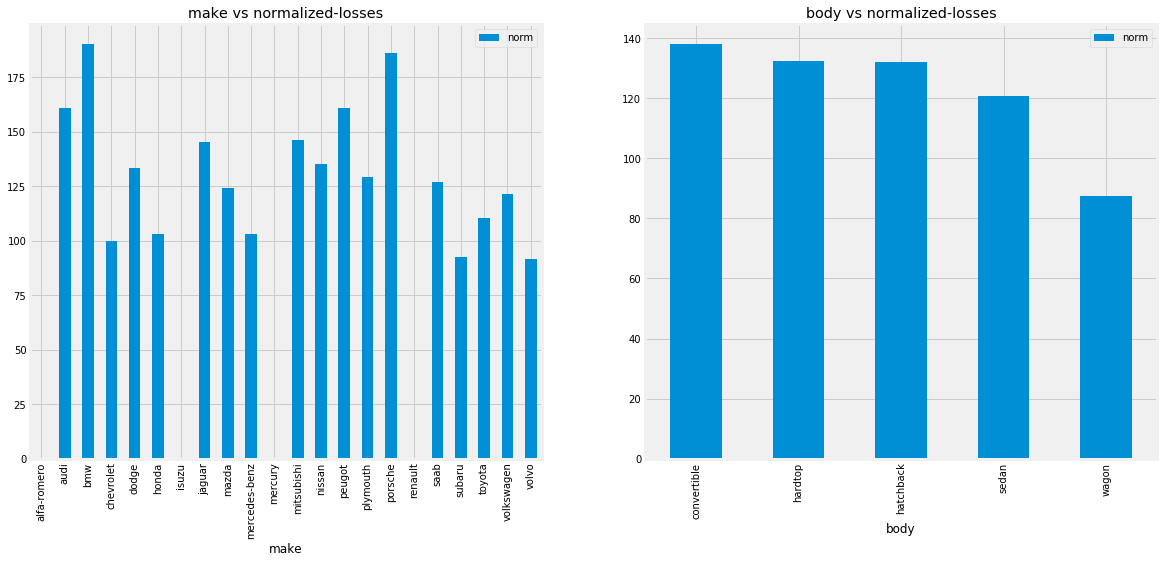

In [0]:
f,ax=plt.subplots(1,2, figsize=(18,8))
dataset[['make','norm']].groupby(['make']).mean().plot.bar(ax=ax[0])
ax[0].set_title('make vs normalized-losses')
dataset[['body','norm']].groupby(['body']).mean().plot.bar(ax=ax[1])
ax[1].set_title('body vs normalized-losses')
plt.show()

This shows us that the missing data for normalized-loss is missing from certin car brands, and that there tends to be a slight change in loss when compared to body style. I will use this to fill in the missing data.

In [0]:
dataset.groupby('body')['norm'].mean() #find the mean value for each body style

body
convertible    138.000000
hardtop        132.600000
hatchback      132.083333
sedan          120.700000
wagon           87.529412
Name: norm, dtype: float64

In [0]:
dataset.loc[(dataset.norm.isnull())&(dataset.body=='convertible'),'norm']=138
dataset.loc[(dataset.norm.isnull())&(dataset.body=='hardtop'),'norm']=132
dataset.loc[(dataset.norm.isnull())&(dataset.body=='hatchback'),'norm']=132
dataset.loc[(dataset.norm.isnull())&(dataset.body=='sedan'),'norm']=120
dataset.loc[(dataset.norm.isnull())&(dataset.body=='wagon'),'norm']=87.5294

dataset.norm.isnull().any()

False

**Number of Doors**

Next I will look to fill the missing door data. I also believe that make and body style may help to groupby for predicting the missing values. 

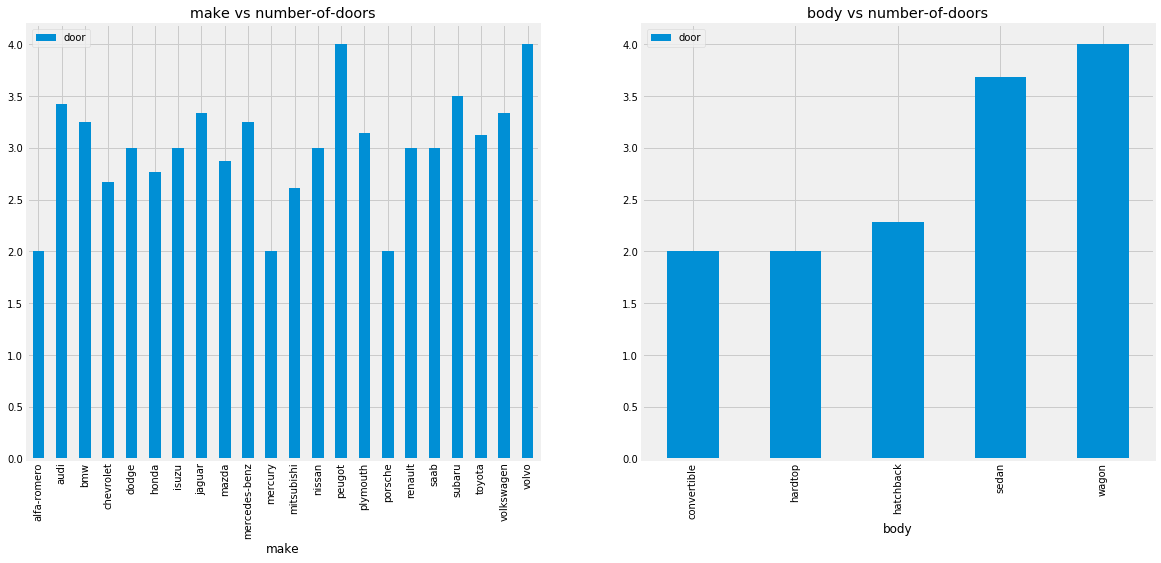

In [0]:
f,ax=plt.subplots(1,2, figsize=(18,8))
dataset[['make','door']].groupby(['make']).mean().plot.bar(ax=ax[0])
ax[0].set_title('make vs number-of-doors')
dataset[['body','door']].groupby(['body']).mean().plot.bar(ax=ax[1])
ax[1].set_title('body vs number-of-doors')
plt.show()

I will again use the body to fill in the missing door data. It appears that body style relates closely with the number of doors, so it will work nicely to predict missing values

In [0]:
dataset.loc[(dataset.door.isnull())&(dataset.body=='convertible'),'door']=2
dataset.loc[(dataset.door.isnull())&(dataset.body=='hardtop'),'door']=2
dataset.loc[(dataset.door.isnull())&(dataset.body=='hatchback'),'door']=2
dataset.loc[(dataset.door.isnull())&(dataset.body=='sedan'),'door']=4
dataset.loc[(dataset.door.isnull())&(dataset.body=='wagon'),'door']=4

dataset.door.isnull().any()

False

**Bore**

Next I will handle the missing bore data. The bore is the diamator of a cylinder. So I would guess that the number of cylinders and engine type may have a relationship with bore.

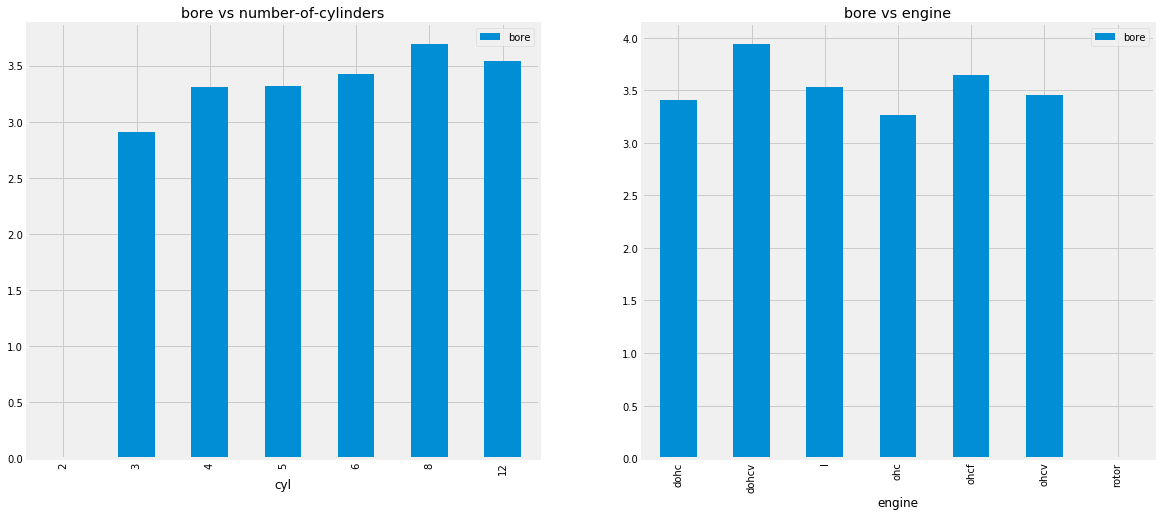

In [0]:
f,ax=plt.subplots(1,2, figsize=(18,8))
dataset[['cyl','bore']].groupby(['cyl']).mean().plot.bar(ax=ax[0])
ax[0].set_title('bore vs number-of-cylinders')
dataset[['engine','bore']].groupby(['engine']).mean().plot.bar(ax=ax[1])
ax[1].set_title('bore vs engine')
plt.show()

I will use the number of cylinders to groupby the bore.

In [0]:
dataset.groupby('engine')['bore'].mean() #find the mean value for each cylinder style

engine
dohc     3.403333
dohcv    3.940000
l        3.526667
ohc      3.260946
ohcf     3.644000
ohcv     3.453846
rotor         NaN
Name: bore, dtype: float64

In [0]:
dataset.loc[(dataset.bore.isnull())&(dataset.cyl==3),'bore']=2.91
dataset.loc[(dataset.bore.isnull())&(dataset.cyl==4),'bore']=3.3059
dataset.loc[(dataset.bore.isnull())&(dataset.cyl==5),'bore']=3.3209
dataset.loc[(dataset.bore.isnull())&(dataset.cyl==6),'bore']=3.692
dataset.loc[(dataset.bore.isnull())&(dataset.cyl==8),'bore']=3.54

print(dataset.bore.isnull().any())

dataset.loc[(dataset.bore.isnull())&(dataset.engine=='dohc'),'bore']=3.403
dataset.loc[(dataset.bore.isnull())&(dataset.engine=='dohcv'),'bore']=3.94
dataset.loc[(dataset.bore.isnull())&(dataset.engine=='l'), 'bore']=3.5267
dataset.loc[(dataset.bore.isnull())&(dataset.engine=='ohc'), 'bore']=3.2609
dataset.loc[(dataset.bore.isnull())&(dataset.engine=='ohcf'), 'bore']=3.644
dataset.loc[(dataset.bore.isnull())&(dataset.engine=='ohcv'), 'bore']=3.454


print(dataset.bore.isnull().any())

#neither of these methods will work since the engine and cylinders are assigend to the missing data, so I will make a estimate value of 2.8 based on number of cylinders

dataset.loc[(dataset.bore.isnull(), 'bore')] = 2.8

print(dataset.bore.isnull().any())


True
True
False


However, this did not work, as the missing data for the bores was missing in the cells with cylinders that did not have an average. That means that the vehicles in question have two cylinders, and I will just make an educated guess at what this value is based on the charts above

**Stroke**

Next I will work with the stroke. Stroke relates with the engine, so I will use engine type and number of cylinders to make a prediction for the missing values.

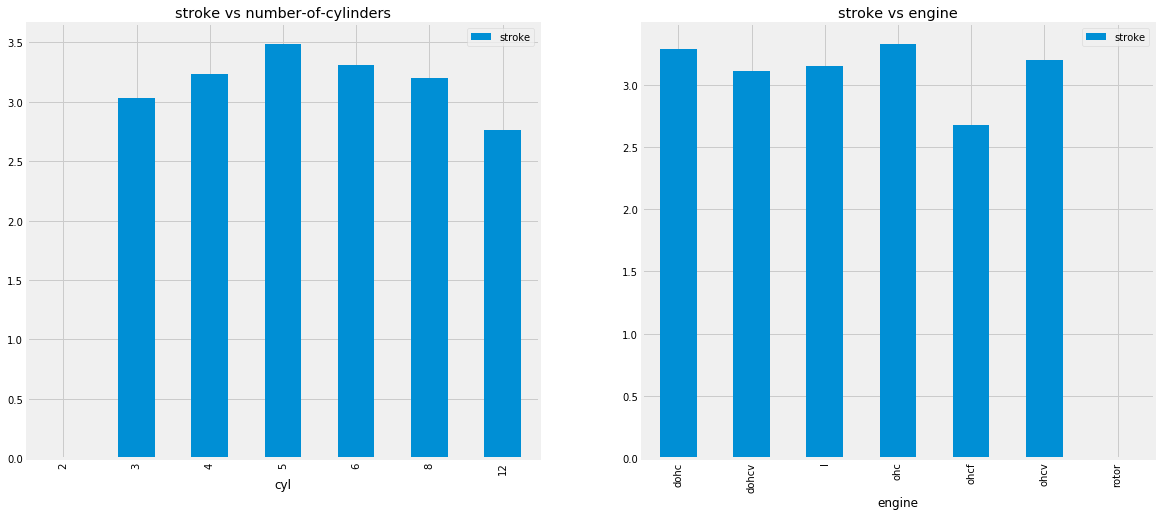

In [0]:
f,ax=plt.subplots(1,2, figsize=(18,8))
dataset[['cyl','stroke']].groupby(['cyl']).mean().plot.bar(ax=ax[0])
ax[0].set_title('stroke vs number-of-cylinders')
dataset[['engine','stroke']].groupby(['engine']).mean().plot.bar(ax=ax[1])
ax[1].set_title('stroke vs engine')
plt.show()

Nothing ovious here for a groupby, so I will just use the mean value for the whole set for the missing values

In [0]:
dataset.stroke.mean()

3.2554228855721337

In [0]:
dataset.loc[(dataset.stroke.isnull(), 'stroke')] = 3.2554228855721337

dataset.stroke.isnull().any()

False

**Horsepower**

I will look at the number of cylinders and the engine type for any relationships to horsepower

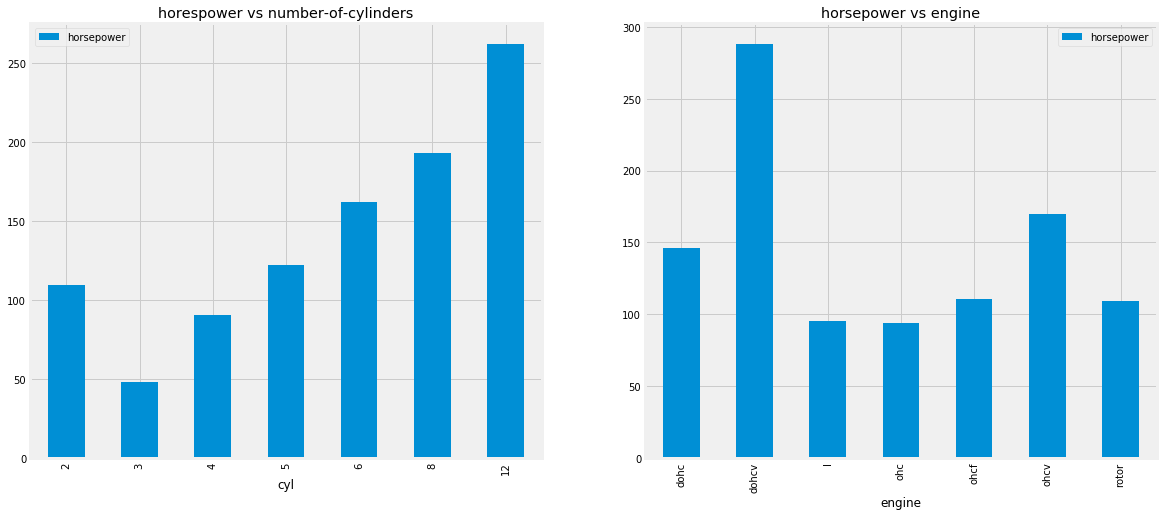

In [0]:
f,ax=plt.subplots(1,2, figsize=(18,8))
dataset[['cyl','horsepower']].groupby(['cyl']).mean().plot.bar(ax=ax[0])
ax[0].set_title('horespower vs number-of-cylinders')
dataset[['engine','horsepower']].groupby(['engine']).mean().plot.bar(ax=ax[1])
ax[1].set_title('horsepower vs engine')
plt.show()

I will use the number of cylinders in a groupby for missing values in horsepower.

In [0]:
dataset.groupby('cyl')['horsepower'].mean() 

cyl
2     109.500000
3      48.000000
4      90.554140
5     122.454545
6     161.916667
8     193.200000
12    262.000000
Name: horsepower, dtype: float64

In [0]:
dataset.loc[(dataset.horsepower.isnull())&(dataset.cyl==3),'horsepower']=109.5
dataset.loc[(dataset.horsepower.isnull())&(dataset.cyl==3),'horsepower']=48
dataset.loc[(dataset.horsepower.isnull())&(dataset.cyl==4),'horsepower']=90.55414
dataset.loc[(dataset.horsepower.isnull())&(dataset.cyl==5),'horsepower']=122.454545
dataset.loc[(dataset.horsepower.isnull())&(dataset.cyl==6),'horsepower']=161.9166667
dataset.loc[(dataset.horsepower.isnull())&(dataset.cyl==8),'horsepower']=262

dataset.horsepower.isnull().any()

False

**RPM**

Next I look at peak rpm, comparing number of cylinders and engine size

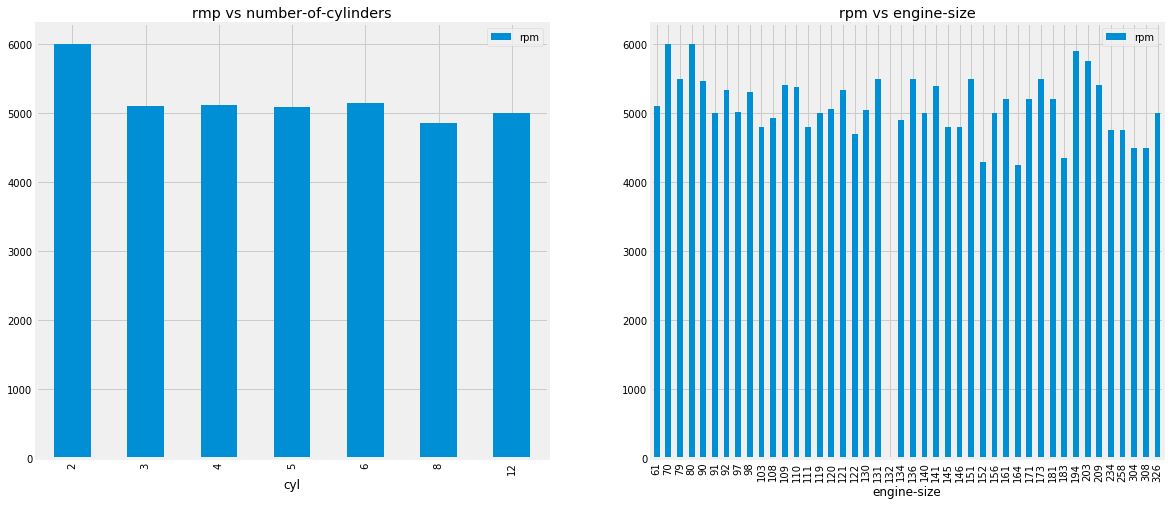

In [0]:
f,ax=plt.subplots(1,2, figsize=(18,8))
dataset[['cyl','rpm']].groupby(['cyl']).mean().plot.bar(ax=ax[0])
ax[0].set_title('rmp vs number-of-cylinders')
dataset[['engine-size','rpm']].groupby(['engine-size']).mean().plot.bar(ax=ax[1])
ax[1].set_title('rpm vs engine-size')
plt.show()

Nothing ovious here, I will use the mean

In [0]:
dataset.loc[(dataset.rpm.isnull(), 'rpm')] = dataset.rpm.mean()

dataset.rpm.isnull().any()

False

**Price**

The final category that needs fixing is price, I will compare brand and number of cylinders

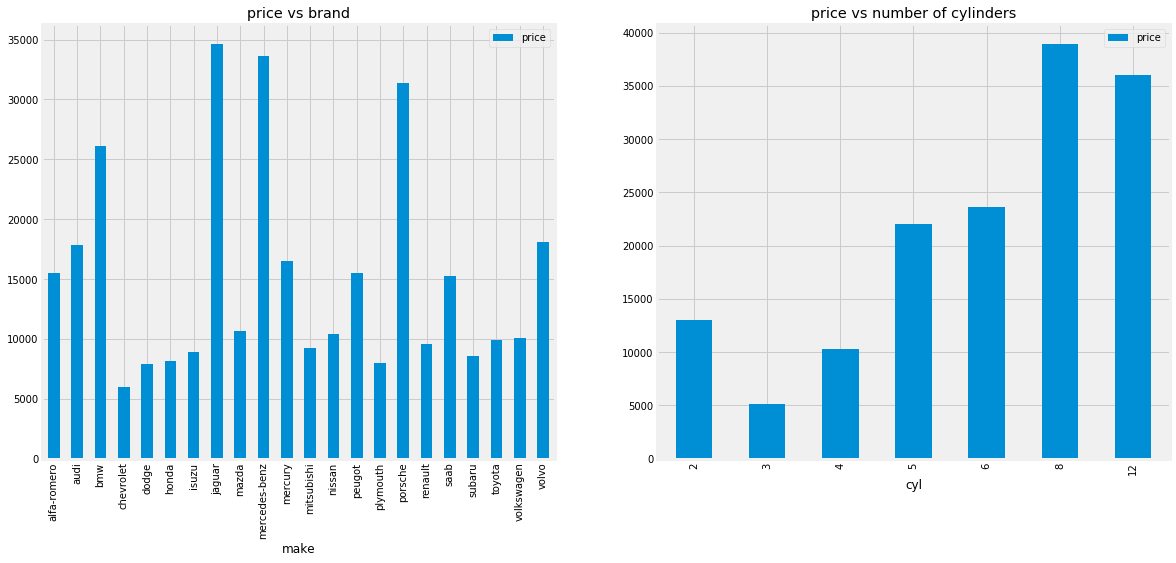

In [0]:
f,ax=plt.subplots(1,2, figsize=(18,8))
dataset[['make','price']].groupby(['make']).mean().plot.bar(ax=ax[0])
ax[0].set_title('price vs brand')
dataset[['cyl','price']].groupby(['cyl']).mean().plot.bar(ax=ax[1])
ax[1].set_title('price vs number of cylinders')
plt.show()

I will fill in missing values for price based off the number of cylinders

In [0]:
dataset.groupby('cyl')['price'].mean()

cyl
2     13020.000000
3      5151.000000
4     10303.197452
5     22007.600000
6     23671.833333
8     38900.000000
12    36000.000000
Name: price, dtype: float64

In [0]:
dataset.loc[(dataset.price.isnull())&(dataset.cyl==2),'price']=13020
dataset.loc[(dataset.price.isnull())&(dataset.cyl==3),'price']=5151.000000
dataset.loc[(dataset.price.isnull())&(dataset.cyl==4),'price']=10303.197452
dataset.loc[(dataset.price.isnull())&(dataset.cyl==5),'price']=22007.600000
dataset.loc[(dataset.price.isnull())&(dataset.cyl==6),'price']=23671.833333
dataset.loc[(dataset.price.isnull())&(dataset.cyl==8),'price']=38900.000000
dataset.loc[(dataset.price.isnull())&(dataset.cyl==12),'price']=36000.000000

dataset.price.isnull().any()

False

Verifying that all counts are equal

In [0]:
print(dataset.isnull().sum())

Unnamed: 0           0
s                    0
norm                 0
make                 0
fuel-type            0
aspiration           0
door                 0
body                 0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
weight               0
engine               0
cyl                  0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
rpm                  0
mpg                  0
price                0
dtype: int64


###2)

Categories nominal data

In [0]:
dataset.head()

,Unnamed: 0,s,norm,make,fuel-type,aspiration,door,body,drive-wheels,engine-location,wheel-base,length,width,height,weight,engine,cyl,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,rpm,mpg,price
0,0,3,138.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,27,13495.0
1,1,3,138.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,27,16500.0
2,2,1,132.0,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154.0,5000.0,26,16500.0
3,3,2,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102.0,5500.0,30,13950.0
4,4,2,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115.0,5500.0,22,17450.0


We want to use one hot encoding for make, body, engine, fuel system

These can all be made into binary catigories (fuel type, asiration, engine-location)

In [0]:
#Cannot be run multiple times
dataset['fuel-type'].replace(['gas','diesel'], [0, 1],inplace=True)     #0:gas and 1:diesel
dataset['aspiration'].replace(['std','turbo'], [0, 1],inplace=True)     #0:std and 1:turbo
dataset['engine-location'].replace(['front','rear'], [0, 1],inplace=True) #0:front and 1:rear

print(dataset['fuel-type'].unique())
print(dataset['aspiration'].unique())
print(dataset['engine-location'].unique())

[0 1]
[0 1]
[0 1]


**One hot encoding**

In [0]:
# One hot encoding.
#Commented sections are not necessary for my model
#dataset = dataset.join(pd.get_dummies(dataset['make']))
dataset = dataset.join(pd.get_dummies(dataset['body']))
#dataset = dataset.join(pd.get_dummies(dataset['engine']))
#dataset = dataset.join(pd.get_dummies(dataset['fuel-system']))
dataset = dataset.join(pd.get_dummies(dataset['drive-wheels']))



Dropping old categories

In [0]:
dataset.drop(['make','body','engine','fuel-system', 'drive-wheels'],axis=1,inplace=True)
dataset.drop(['Unnamed: 0'],axis=1,inplace=True)
dataset.head()

,s,norm,fuel-type,aspiration,door,engine-location,wheel-base,length,width,height,weight,cyl,engine-size,bore,stroke,compression-ratio,horsepower,rpm,mpg,price,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd
0,3,138.0,0,0,2.0,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,27,13495.0,1,0,0,0,0,0,0,1
1,3,138.0,0,0,2.0,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,27,16500.0,1,0,0,0,0,0,0,1
2,1,132.0,0,0,2.0,0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154.0,5000.0,26,16500.0,0,0,1,0,0,0,0,1
3,2,164.0,0,0,4.0,0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102.0,5500.0,30,13950.0,0,0,0,1,0,0,1,0
4,2,164.0,0,0,4.0,0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115.0,5500.0,22,17450.0,0,0,0,1,0,1,0,0


###3)

Correlation matrix for all numeric data

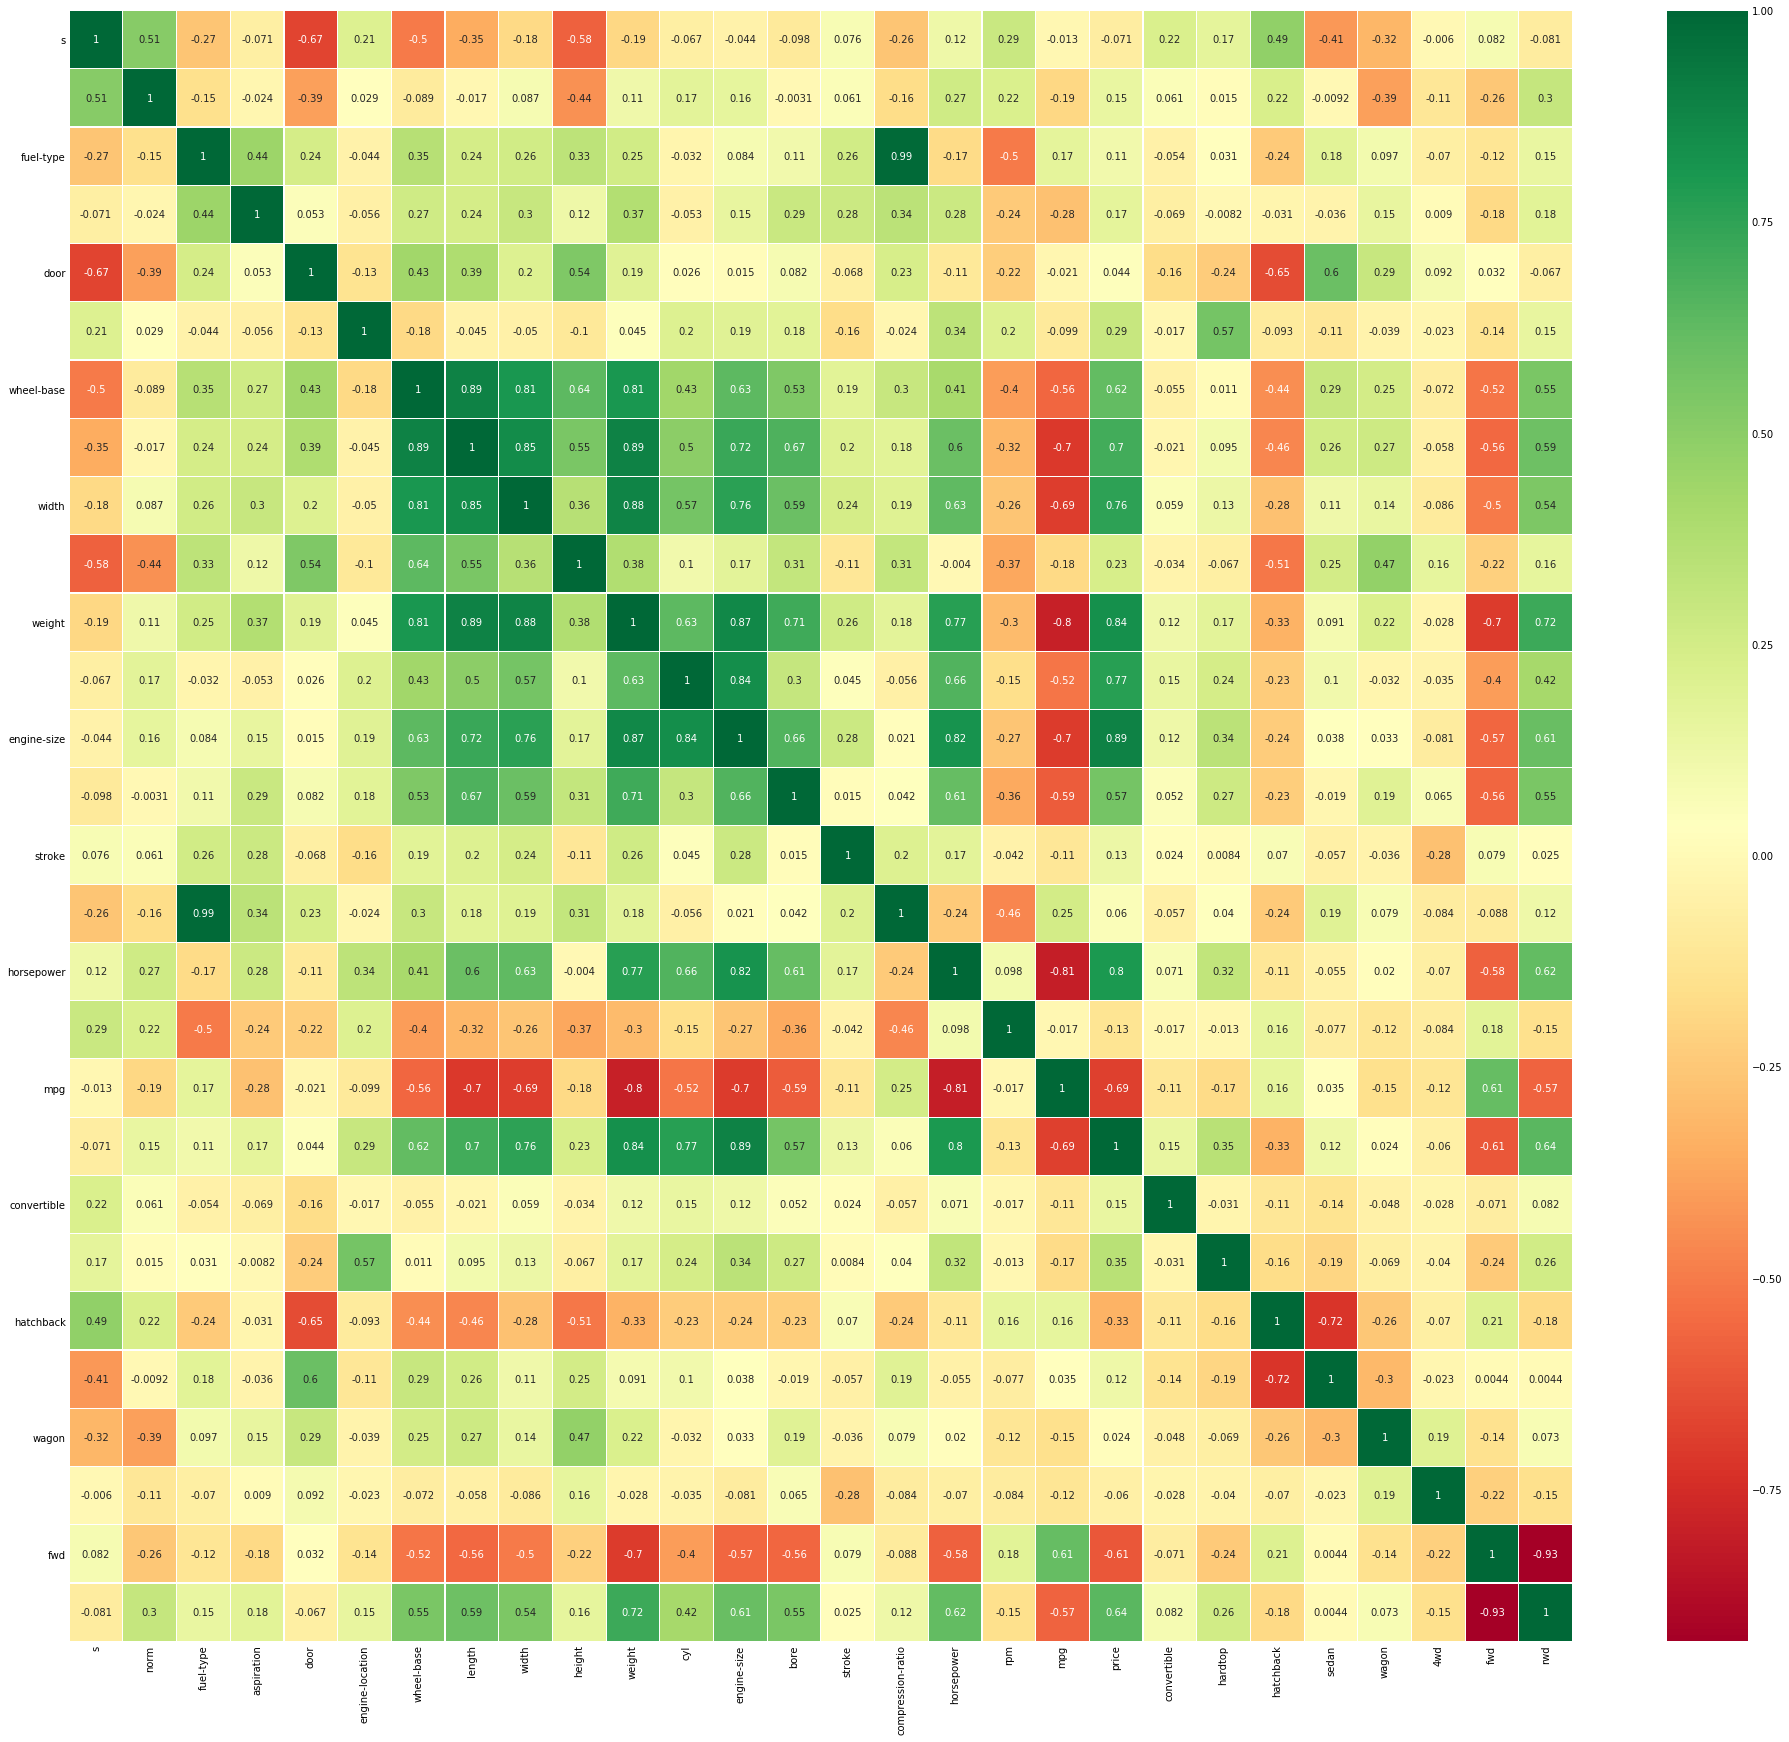

In [0]:
sns.heatmap(dataset.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(30, 30)
plt.show()

###4)

Plots

Highest correlation: Number of doors, cylinders, and normalized-loss

Low correlation: aspiration

**Risk Factor vs The Number of Doors**

In [0]:
pd.crosstab(dataset.s,dataset.door).style.background_gradient(cmap='summer_r')


door,2.0,4.0
s,,
-2,0,3
-1,0,22
0,7,60
1,33,21
2,22,10
3,27,0


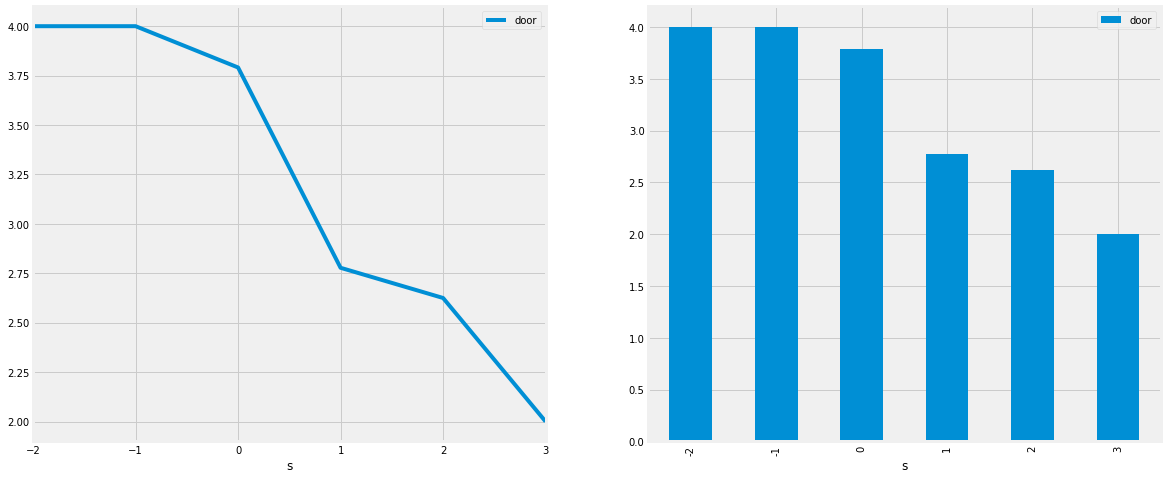

In [0]:
f,ax=plt.subplots(1,2, figsize=(18,8))
dataset[['s','door']].groupby(['s']).mean().plot(ax=ax[0])
dataset[['s', 'door']].groupby(['s']).mean().plot.bar(ax=ax[1])
plt.show()

**Risk Factor vs The number of Cylinders**

In [0]:
pd.crosstab(dataset.s,dataset.cyl).style.background_gradient(cmap='summer_r')

cyl,2,3,4,5,6,8,12
s,,,,,,,
-2,0,0,3,0,0,0,0
-1,0,0,14,3,4,1,0
0,0,0,52,3,10,1,1
1,0,0,46,3,3,2,0
2,0,1,29,2,0,0,0
3,4,0,15,0,7,1,0


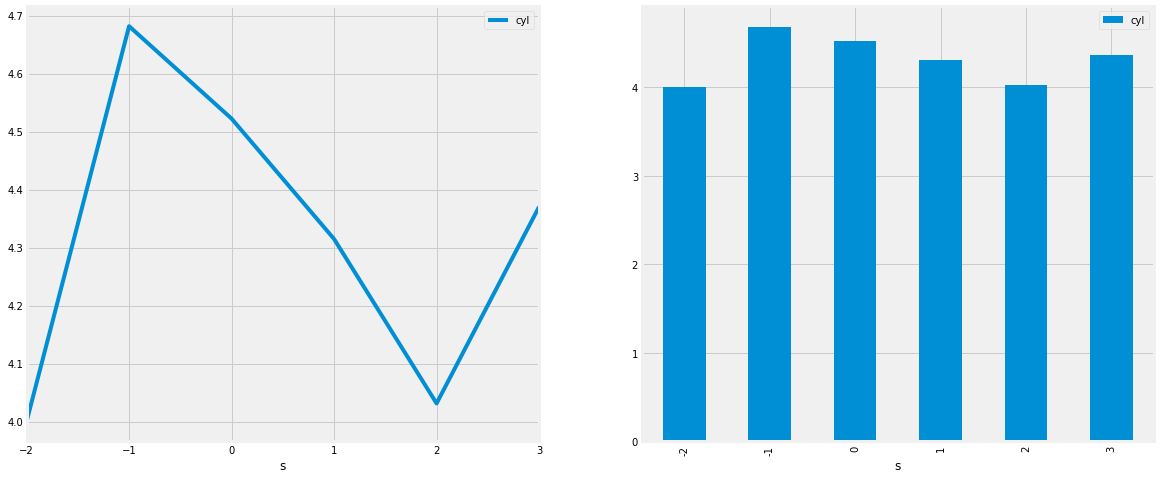

In [0]:
f,ax=plt.subplots(1,2, figsize=(18,8))
dataset[['s','cyl']].groupby(['s']).mean().plot(ax=ax[0])
dataset[['s', 'cyl']].groupby(['s']).mean().plot.bar(ax=ax[1])
plt.show()

**Risk Factor vs Normalization-Loss**

In [0]:
pd.crosstab(dataset.s,dataset.norm).style.background_gradient(cmap='summer_r')

norm,65.0,74.0,77.0,78.0,81.0,83.0,85.0,87.0,87.5294,89.0,90.0,91.0,93.0,94.0,95.0,98.0,101.0,102.0,103.0,104.0,106.0,107.0,108.0,110.0,113.0,115.0,118.0,119.0,120.0,121.0,122.0,125.0,128.0,129.0,132.0,134.0,137.0,138.0,142.0,145.0,148.0,150.0,153.0,154.0,158.0,161.0,164.0,168.0,186.0,188.0,192.0,194.0,197.0,231.0,256.0
s,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-1,5,4,0,0,0,0,0,0,1,0,1,0,3,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,1,1,2,0,5,0,6,2,0,8,1,0,0,0,0,5,0,0,4,0,2,1,0,3,1,0,12,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,7,0,0,0,2,1,0,0,0,0
1,0,1,0,0,0,0,0,2,1,0,0,0,0,0,0,1,3,0,2,3,0,1,0,0,2,0,3,2,2,0,2,3,5,2,4,0,0,0,0,0,4,0,0,3,2,1,0,4,0,0,0,0,0,1,0
2,0,0,0,0,0,3,0,0,0,0,0,0,0,5,0,0,0,0,0,3,0,0,0,0,0,0,0,0,1,1,2,0,0,0,2,6,2,0,0,0,0,0,0,0,0,3,2,1,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,4,1,1,0,7,2,0,0,0,0,0,1,0,0,2,2,0,1


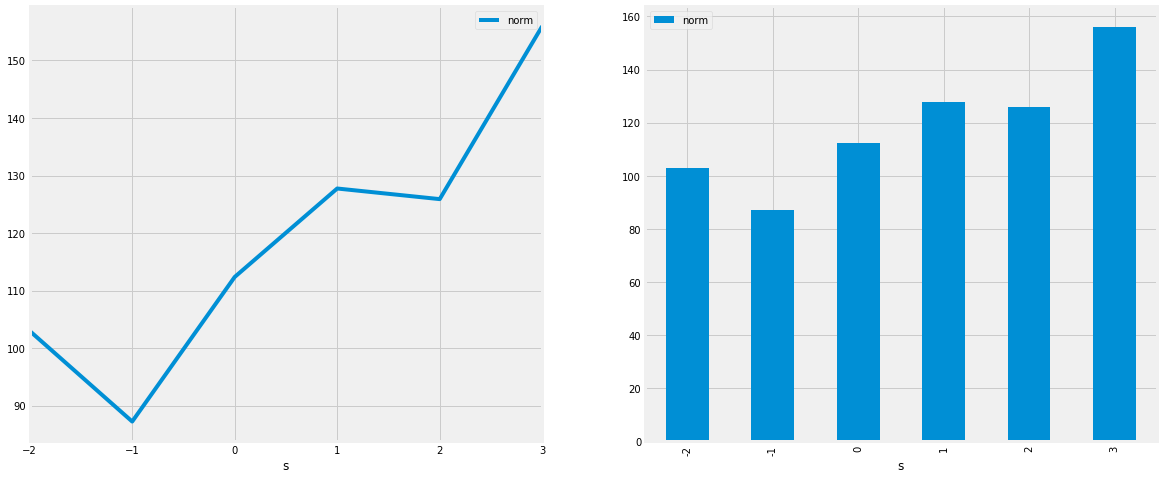

In [0]:
f,ax=plt.subplots(1,2, figsize=(18,8))
dataset[['s','norm']].groupby(['s']).mean().plot(ax=ax[0])
dataset[['s','norm']].groupby(['s']).mean().plot.bar(ax=ax[1])
plt.show()

**Risk Factor vs Aspiration**

In [0]:
pd.crosstab(dataset.aspiration,dataset.s).style.background_gradient(cmap='summer_r')

s,-2,-1,0,1,2,3
aspiration,,,,,,
0,2,14,56,47,30,19
1,1,8,11,7,2,8


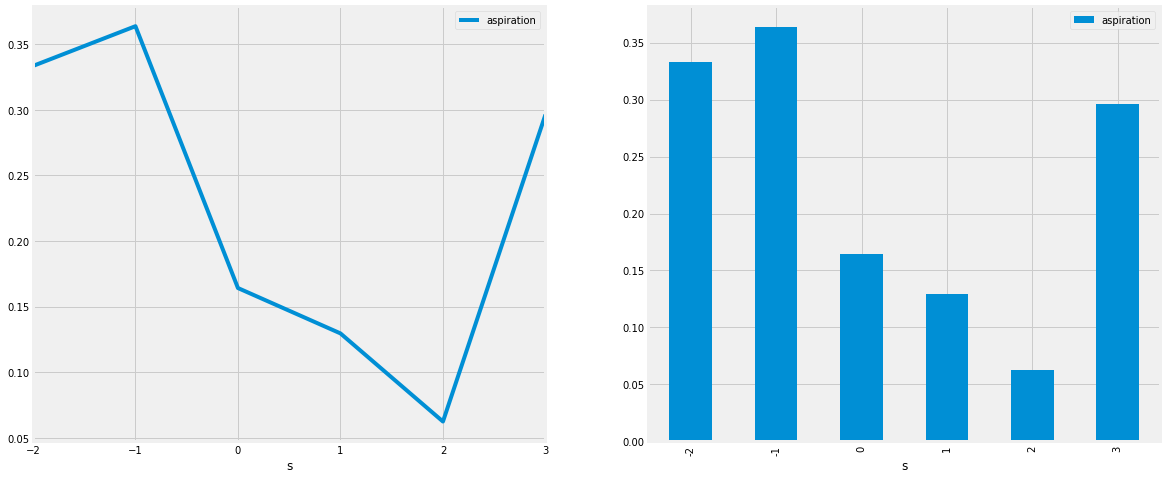

In [0]:
f,ax=plt.subplots(1,2, figsize=(18,8))
dataset[['s','aspiration']].groupby(['s']).mean().plot(ax=ax[0])
dataset[['s','aspiration']].groupby(['s']).mean().plot.bar(ax=ax[1])
plt.show()

##Extra


The accuracy of the Random Forests is 0.8225806451612904
CV Mean: 0.4757142857142858
Std: 0.19847433963125685


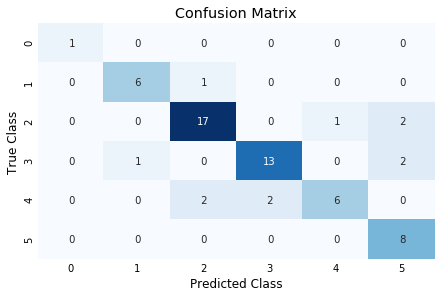

AxesSubplot(0.08,0.125;0.87x0.755)


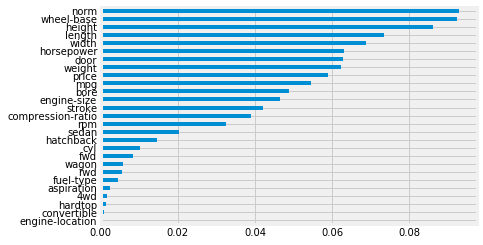

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

X=dataset[dataset.columns[1:]]
Y=dataset['s']

dataset,test=train_test_split(dataset,test_size=0.3,random_state=0,stratify=dataset['s'])

train_X=dataset[dataset.columns[1:]]
train_Y=dataset[dataset.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction,test_Y))

from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
print('CV Mean:',cv_result.mean())
print('Std:',cv_result.std())

cm = pd.DataFrame(confusion_matrix(test_Y,prediction))
sns.heatmap(cm, annot=True, cbar=None, cmap='Blues',fmt='2.0f')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

print(pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh())

AxesSubplot(0.08,0.125;0.87x0.755)


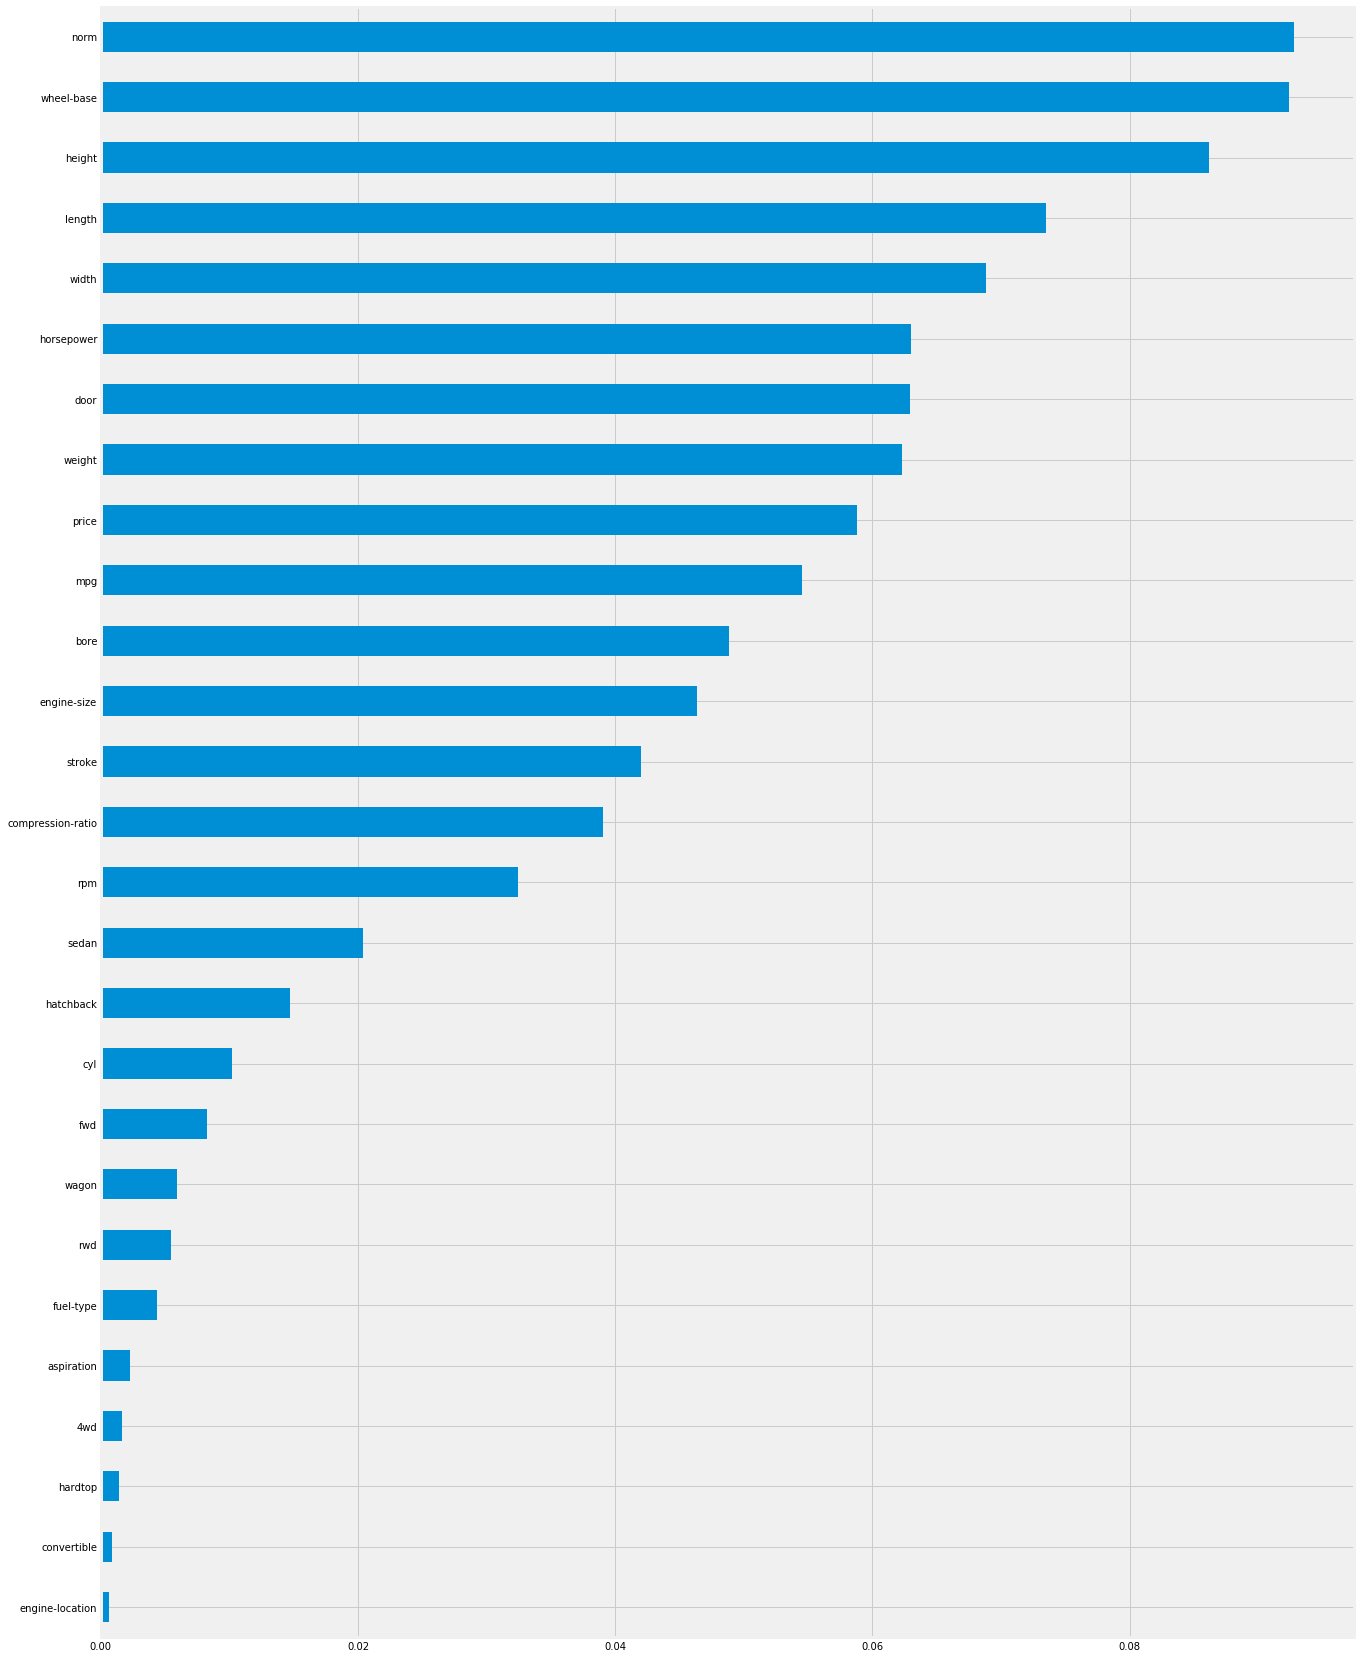

In [0]:
print(pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot(kind='barh', figsize=(20,30)))